In [1]:
import tensorflow as tf
from tensorflow.keras import datasets
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

In [2]:
# Download the data set
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

train_images, test_images = train_images / 255.0, test_images / 255.0

170498071/170498071 [==============================] - 911s 5us/step


In [3]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

In [5]:
model = Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

model.compile(optimizer='adam', 
             loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])
history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 82s 50ms/step - loss: 1.5348 - accuracy: 0.4408 - val_loss: 1.2652 - val_accuracy: 0.5393
Epoch 2/10
1563/1563 [==============================] - 68s 44ms/step - loss: 1.1581 - accuracy: 0.5897 - val_loss: 1.0448 - val_accuracy: 0.6311
Epoch 3/10
1563/1563 [==============================] - 72s 46ms/step - loss: 1.0100 - accuracy: 0.6464 - val_loss: 1.0154 - val_accuracy: 0.6394
Epoch 4/10
1563/1563 [==============================] - 68s 44ms/step - loss: 0.9191 - accuracy: 0.6759 - val_loss: 0.9580 - val_accuracy: 0.6679
Epoch 5/10
1563/1563 [==============================] - 67s 43ms/step - loss: 0.8525 - accuracy: 0.7027 - val_loss: 0.9023 - val_accuracy: 0.6883
Epoch 6/10
1563/1563 [==============================] - 67s 43ms/step - loss: 0.7821 - accuracy: 0.7242 - val_loss: 0.9467 - val_accuracy: 0.6728
Epoch 7/10
1563/1563 [==============================] - 69s 44ms/step - loss: 0.7374 - accuracy: 0.7417 - val_loss: 0.9455 -

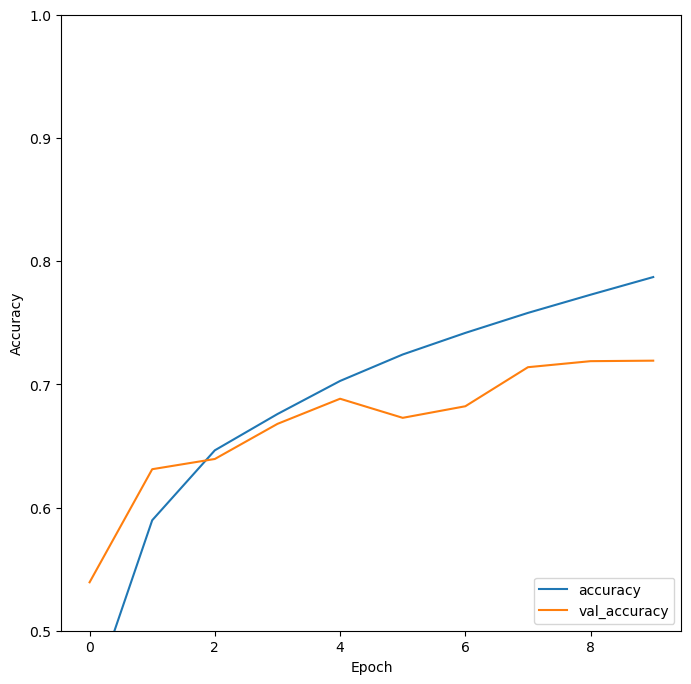

In [6]:
from matplotlib import pyplot as plt


plt.figure(figsize=(8, 8))
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

plt.savefig("output_report.png")